<a href="https://colab.research.google.com/github/veyselalevcan/Customer-Churn_Feature_Engineering/blob/main/Customer_Churn_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem: A machine learning model is required to predict which customers will leave the company.
# You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

# Telco customer churn data contains information about a fictitious telecom company that provided home phone and Internet services to 7,043 customers in California in the third quarter. It includes which customers left, stayed, or signed up for their service.

# 21 Variable 7043 Observations

# CustomerId : Customer Id
# Gender : Sex
# SeniorCitizen : Whether the customer is elderly (1, 0)
# Partner : Whether the customer has a partner (Yes, No) ? Married or not
# Dependents : Customer has dependents (Yes, No) (Child, mother, father, grandparent)
# Tenure : Number of months customer has been with the company
# PhoneService : Customer has phone service (Yes, No)
# MultipleLines : Customer has multiple lines (Yes, No, No phone service)
# InternetService : Customer's internet service provider (DSL, Fiber optic, No)
# OnlineSecurity : Customer has online security (Yes, No, No internet service)
# OnlineBackup : Customer has online backup (Yes, No, No internet service)
# DeviceProtection : Customer has device protection (Yes, No, No internet service)
# TechSupport : Customer has technical support (Yes, No, No internet service)
# StreamingTV : Customer has streaming TV (Yes, No, No internet service) Customer has access to streaming TV programs from a third-party provider Indicates whether the customer is using the Internet service
# StreamingMovies : Whether the customer is streaming movies (Yes, No, No Internet service) Indicates whether the customer is using the Internet service to stream movies from a third-party provider
# Contract : The customer's contract term (Month-to-month, One year, Two years)
# PaperlessBilling : Whether the customer has a paperless bill (Yes, No)
# PaymentMethod : The customer's payment method (Electronic check, Postal check, Wire transfer (automatic), Credit card (automatic))
# MonthlyCharges : The amount the customer is charged monthly
# TotalCharges : The total amount the customer is charged
# Churn : Whether the customer is using (Yes or No) - Customers who have left in the last month or quarter

# Each row represents a unique customer.
# Variables contain information about customer service, account, and demographic data.
# Services customers have signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
# Customer account information - how long they have been a customer, contract, payment method, paperless billing, monthly fees, and total charges
# Demographic information about customers - gender, age range, and whether they have partners and dependents

In [1]:
# TASK 1: EXPLORATORY DATA ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv("Telco-Customer-Churn.csv")
print(df.head(), df.shape, df.info(), end='\n\n\n')



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
# TotalCharges should be numeric.
#The errors='coerce' parameter tells the to_numeric function that values ​​that cannot be converted to numbers
#should be marked as NaN.
#If a value cannot be converted to a number (for example, "abc" or an empty cell),
#then it is replaced with the NaN value. This makes it easier to manage errors or missing data in the data.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [3]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)
df['Churn'].head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  7590-VHVEG  Female              0     Yes         No       1    

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [6]:
# FINDING NUMERIC AND CATEGORICAL VARIABLES
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols
num_cols
cat_but_car

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


['customerID']

In [7]:
print(f'cat_cols=', cat_cols, end='\n\n')
print(f'num_cols=', num_cols, end='\n\n')
print(f'cat_but_car =', cat_but_car)


cat_cols= ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Churn']

num_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_but_car = ['customerID']


        gender  Ratio
gender               
Male      3555     50
Female    3488     49
##########################################


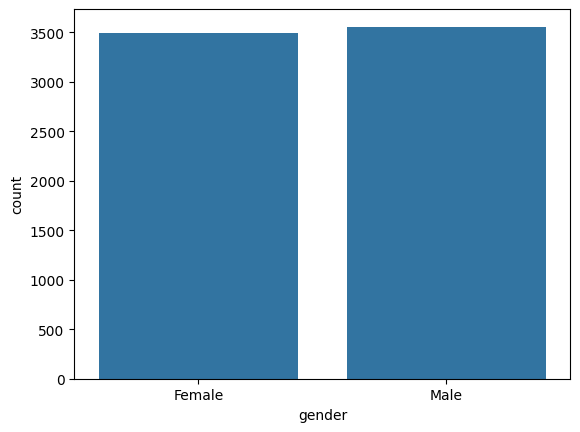

         Partner  Ratio
Partner                
No          3641     51
Yes         3402     48
##########################################


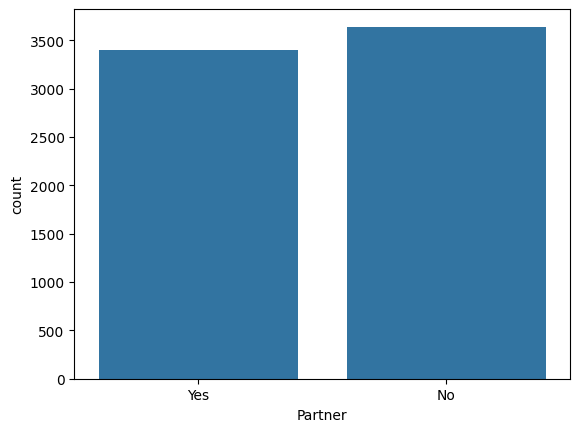

            Dependents  Ratio
Dependents                   
No                4933     70
Yes               2110     29
##########################################


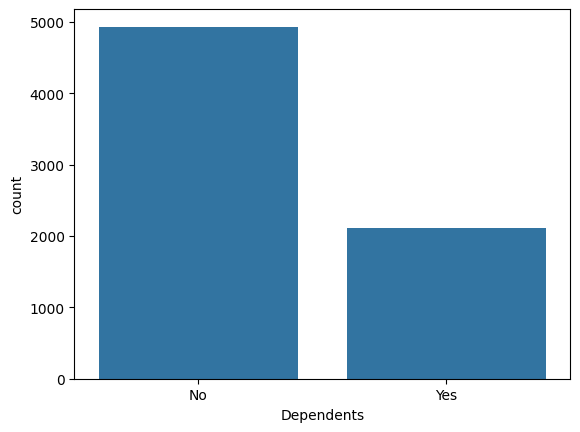

              PhoneService  Ratio
PhoneService                     
Yes                   6361     90
No                     682      9
##########################################


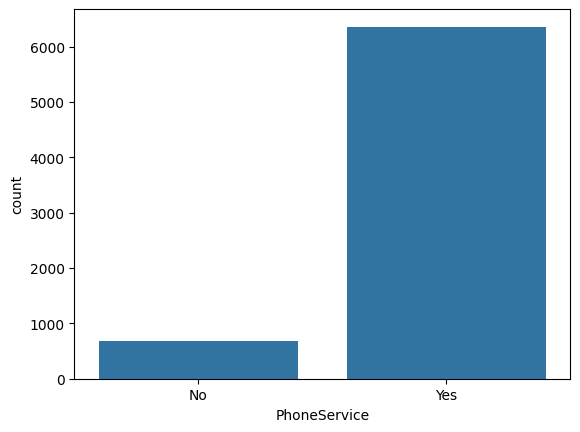

                  MultipleLines  Ratio
MultipleLines                         
No                         3390     48
Yes                        2971     42
No phone service            682      9
##########################################


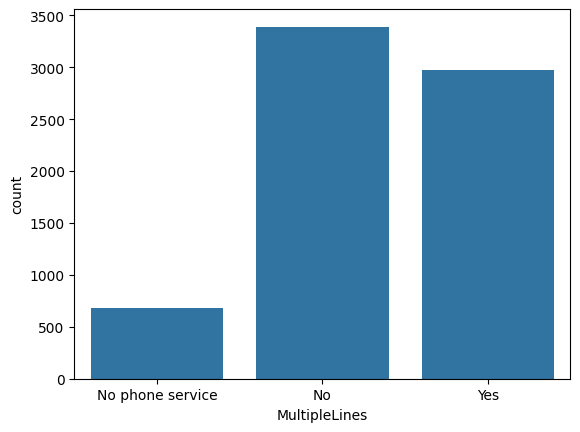

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096     43
DSL                         2421     34
No                          1526     21
##########################################


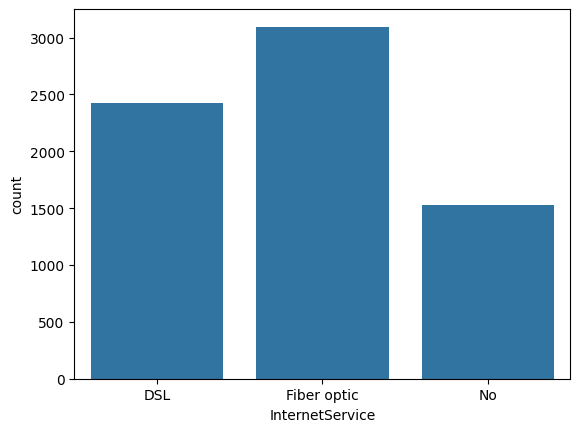

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498     49
Yes                            2019     28
No internet service            1526     21
##########################################


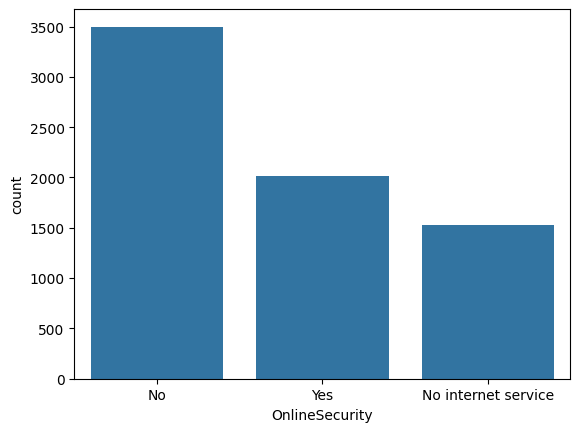

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088     43
Yes                          2429     34
No internet service          1526     21
##########################################


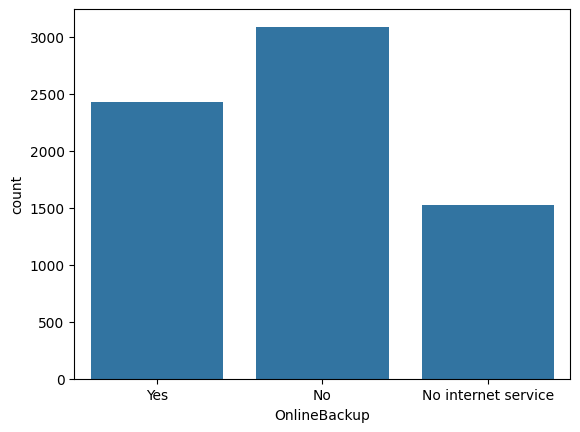

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095     43
Yes                              2422     34
No internet service              1526     21
##########################################


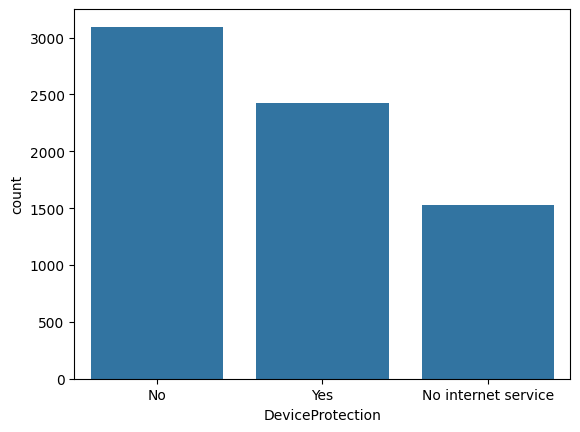

                     TechSupport  Ratio
TechSupport                            
No                          3473     49
Yes                         2044     29
No internet service         1526     21
##########################################


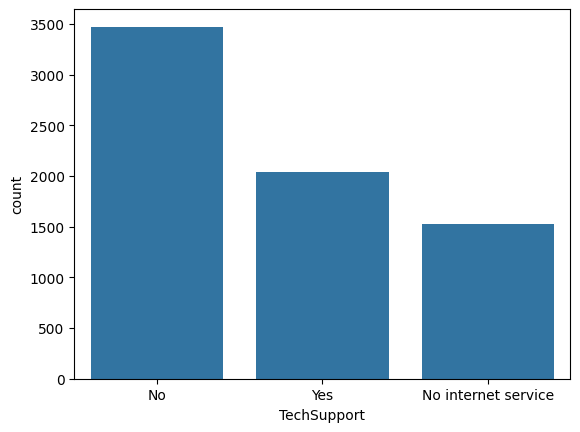

                     StreamingTV  Ratio
StreamingTV                            
No                          2810     39
Yes                         2707     38
No internet service         1526     21
##########################################


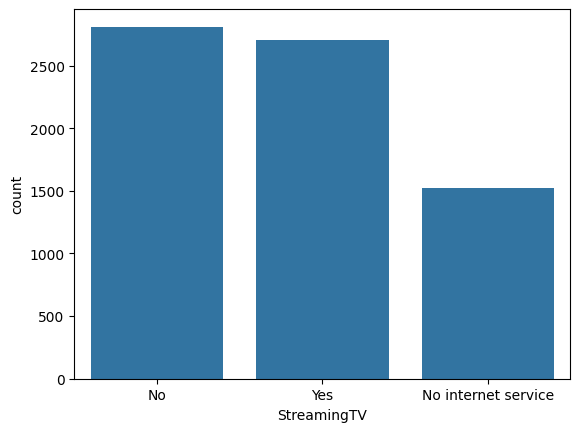

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785     39
Yes                             2732     38
No internet service             1526     21
##########################################


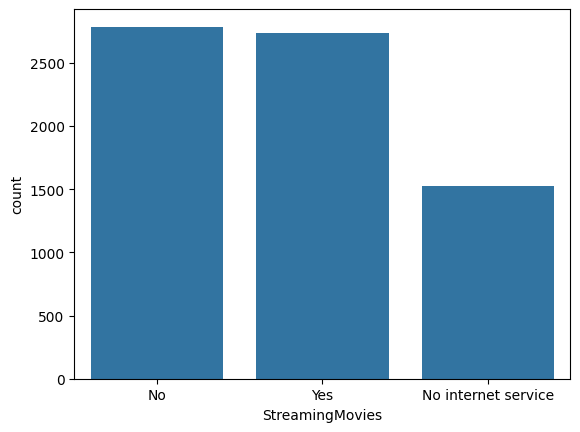

                Contract  Ratio
Contract                       
Month-to-month      3875     55
Two year            1695     24
One year            1473     20
##########################################


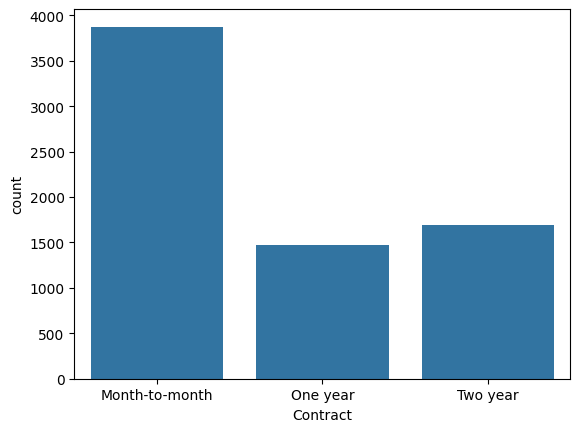

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171     59
No                            2872     40
##########################################


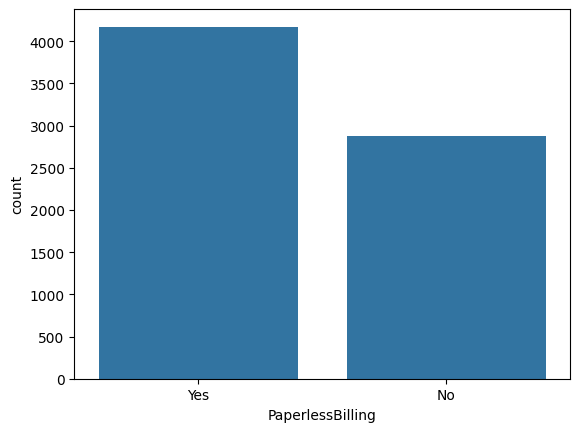

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365     33
Mailed check                        1612     22
Bank transfer (automatic)           1544     21
Credit card (automatic)             1522     21
##########################################


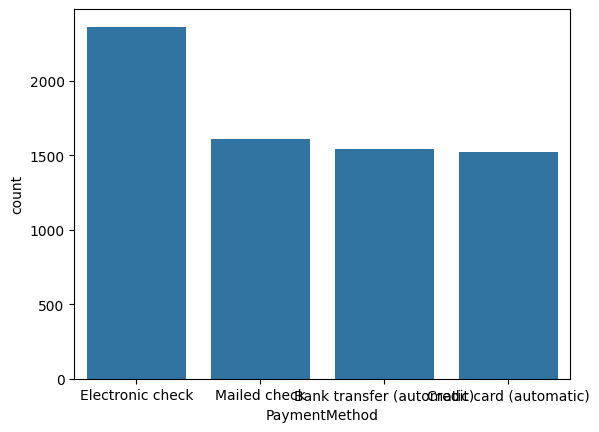

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901     83
1                       1142     16
##########################################


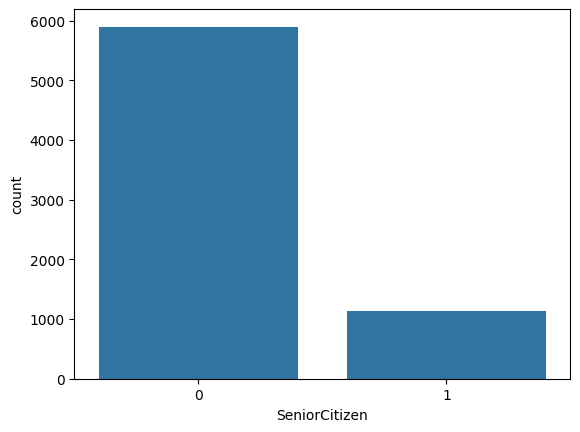

       Churn  Ratio
Churn              
0       5174     73
1       1869     26
##########################################


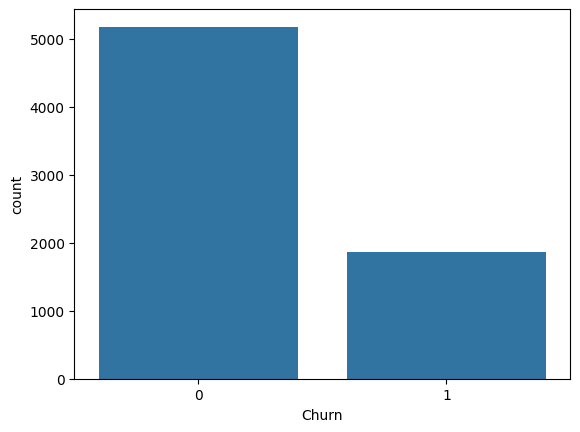

In [8]:
# ANALYSIS OF CATEGORICAL VARIABLES
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() // len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
  cat_summary(df, col, plot=True)


count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


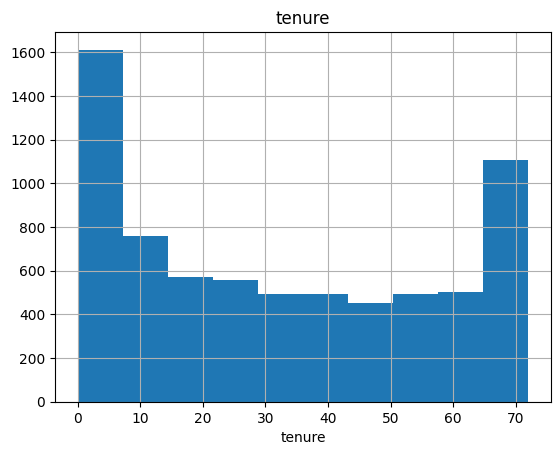

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


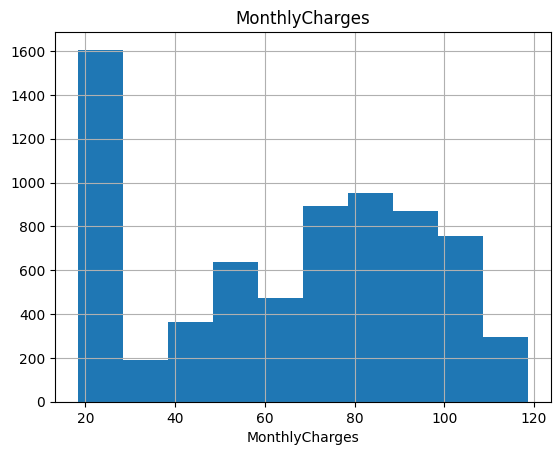

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


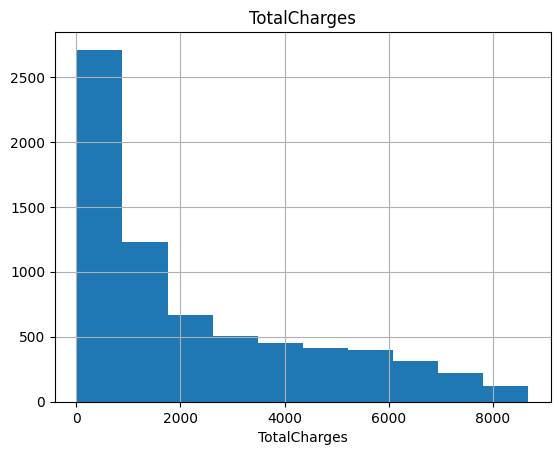

In [9]:
# ANALYSIS OF NUMERICAL VARIABLES
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)


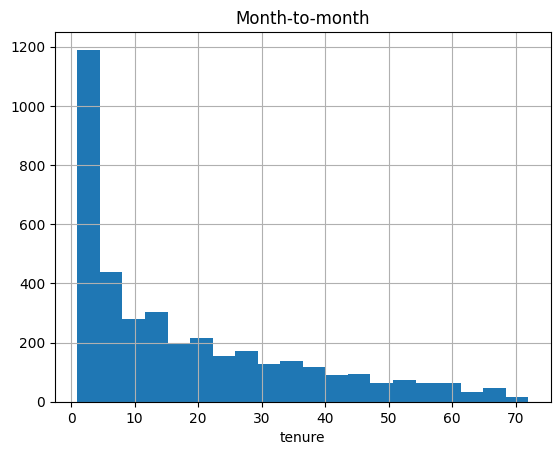

In [10]:
# When we look at the tenure, we see that there are many 1-month customers, followed by 70-month customers.
# This may have happened due to different contracts, let's look at the tenure of people with monthly contracts and
#the tenure of people with 2-year contracts.
df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

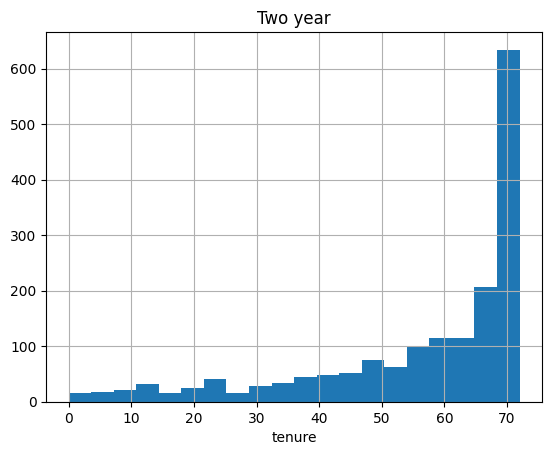

In [11]:
df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.show()

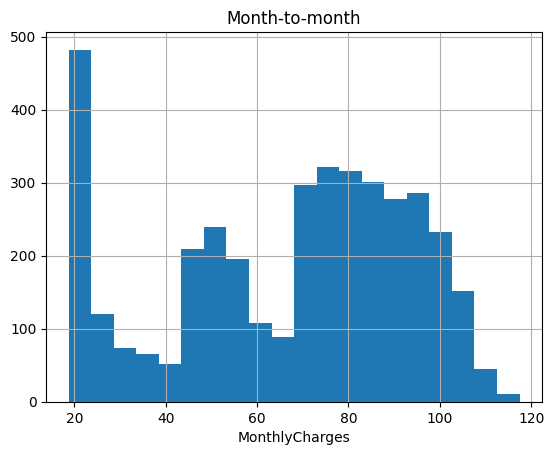

In [12]:
#Looking at MonthyChargers, customers with a monthly contract may have higher average monthly payments.
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Month-to-month")
plt.show()

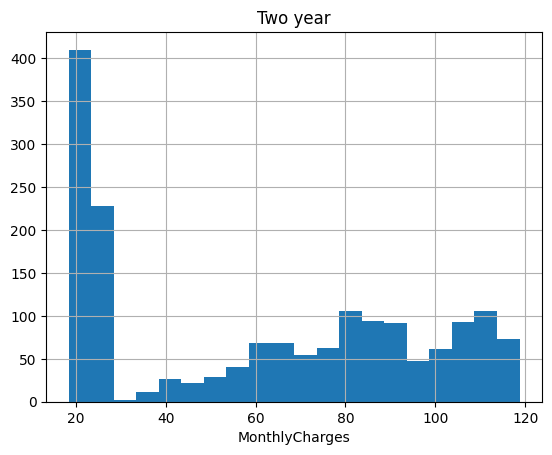

In [13]:
df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Two year")
plt.show()

In [14]:
# ANALYSIS OF NUMERIC VARIABLES BY TARGET
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)


       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




In [15]:
# ANALYSIS OF CATEGORICAL VARIABLES BY TARGET
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() // len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)


gender
        TARGET_MEAN  Count  Ratio
gender                           
Female        0.269   3488     49
Male          0.262   3555     50


Partner
         TARGET_MEAN  Count  Ratio
Partner                           
No             0.330   3641     51
Yes            0.197   3402     48


Dependents
            TARGET_MEAN  Count  Ratio
Dependents                           
No                0.313   4933     70
Yes               0.155   2110     29


PhoneService
              TARGET_MEAN  Count  Ratio
PhoneService                           
No                  0.249    682      9
Yes                 0.267   6361     90


MultipleLines
                  TARGET_MEAN  Count  Ratio
MultipleLines                              
No                      0.250   3390     48
No phone service        0.249    682      9
Yes                     0.286   2971     42


InternetService
                 TARGET_MEAN  Count  Ratio
InternetService                           
DSL                    0.19

In [16]:
#CORELATION
df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


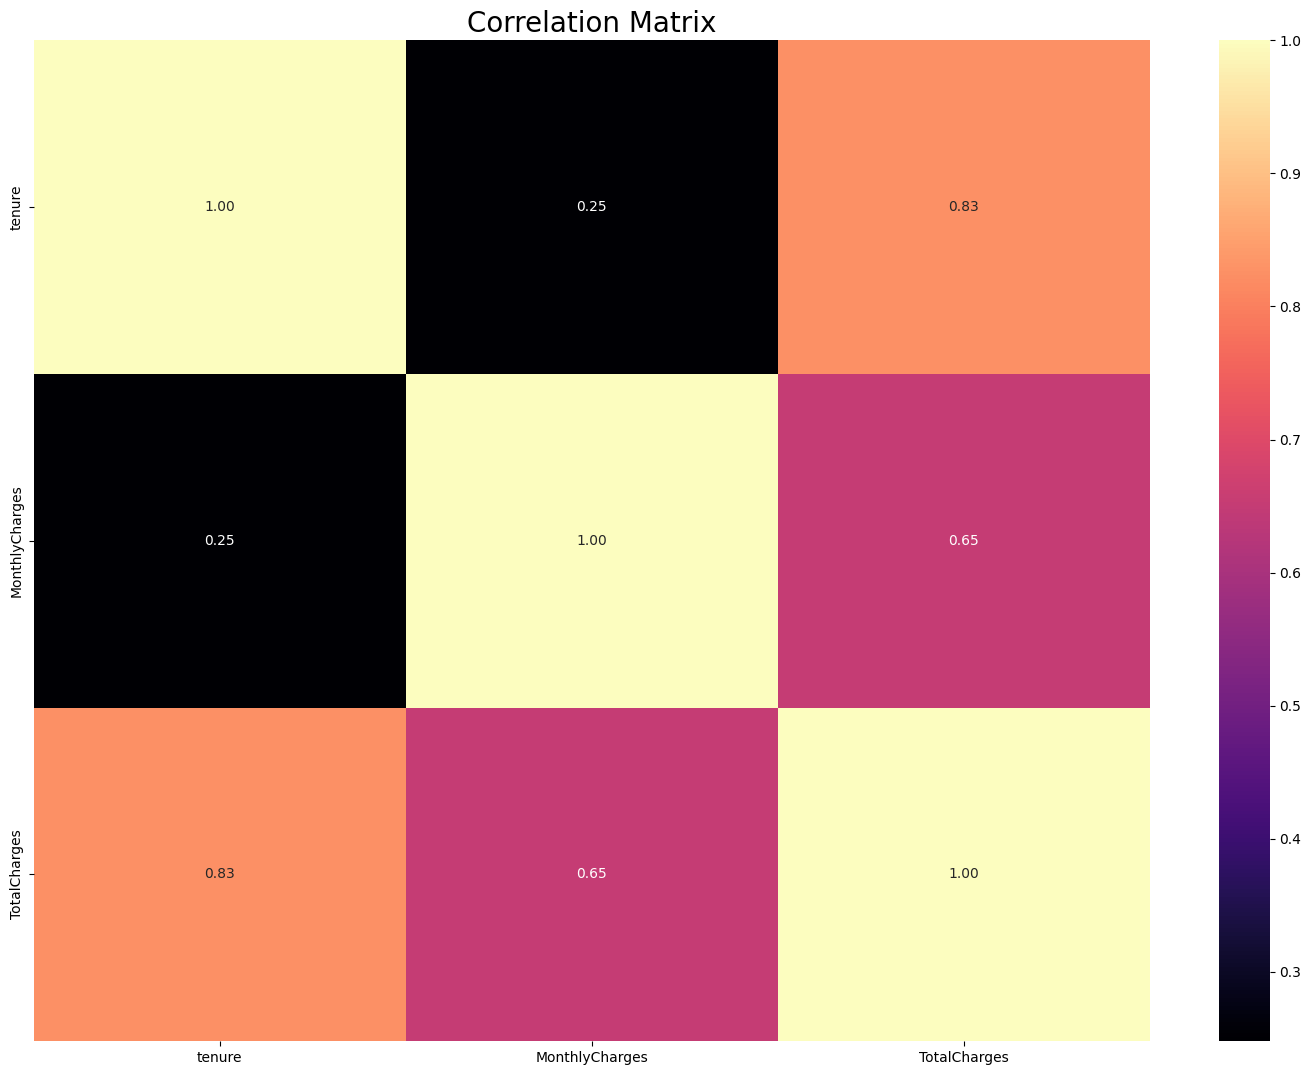

In [17]:
# Corelation Matris
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# GÖREV 2: FEATURE ENGINEERING
##################################

In [19]:
# Missing Value Analysis
df.isnull().sum()  # TotalCharges: 11

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

              n_miss  ratio
TotalCharges      11  0.160


In [21]:
 df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [22]:
# BASE MODEL INSTALLATION
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [25]:
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [26]:
print(dff.columns)

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'SeniorCitizen_1'],
      dtype='object')


In [28]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    # categorical_cols içindeki sadece DataFrame'de mevcut olan sütunları seçiyoruz
    valid_cols = [col for col in categorical_cols if col in dataframe.columns]

    # pd.get_dummies ile one-hot encoding işlemini gerçekleştiriyoruz
    dataframe = pd.get_dummies(dataframe, columns=valid_cols, drop_first=drop_first)

    return dataframe


dff = one_hot_encoder(dff, cat_cols, drop_first=True)
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,7590-VHVEG,1,29.850,29.850,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,34,56.950,1889.500,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,2,53.850,108.150,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,7795-CFOCW,45,42.300,1840.750,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,2,70.700,151.650,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [29]:
y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

In [30]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345))]

In [31]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8055
Auc: 0.8428
Recall: 0.5485
Precision: 0.6612
F1: 0.5992
########## KNN ##########
Accuracy: 0.7637
Auc: 0.7464
Recall: 0.4462
Precision: 0.5711
F1: 0.5005
########## CART ##########
Accuracy: 0.7277
Auc: 0.6579
Recall: 0.504
Precision: 0.4876
F1: 0.4954
########## RF ##########
Accuracy: 0.792
Auc: 0.8254
Recall: 0.4837
Precision: 0.6451
F1: 0.5526
########## SVM ##########
Accuracy: 0.7696
Auc: 0.7141
Recall: 0.2905
Precision: 0.6495
F1: 0.4009
########## XGB ##########
Accuracy: 0.783
Auc: 0.8243
Recall: 0.5126
Precision: 0.6107
F1: 0.5568
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[L

Bu sonuçlar, farklı makine öğrenimi modellerinin performansını karşılaştırmak için hesaplanmış olan bir dizi değerlendirme metriğini göstermektedir. Her model için hesaplanan temel performans metrikleri arasında Accuracy, AUC (Area Under the Curve), Recall, Precision ve F1 skoru bulunmaktadır. İşte bu sonuçların yorumları:

### 1. Logistic Regression (LR)
- **Accuracy:** 0.8055 - Modelin genel doğruluğu, tüm örnekler arasında doğru tahmin edilenlerin oranı.
- **AUC:** 0.8428 - Modelin ayrıştırma yeteneği, sınıflar arasındaki farkı ne kadar iyi ayırdığı.
- **Recall:** 0.5485 - Modelin pozitif sınıfları ne kadar iyi yakaladığı.
- **Precision:** 0.6612 - Modelin pozitif tahminlerinin ne kadarının doğru olduğu.
- **F1:** 0.5992 - Precision ve Recall'ün dengeli bir ölçüsü.

**Yorum:** Logistic Regression, yüksek bir AUC ve genel doğruluk ile iyi bir performans gösteriyor. Precision ve Recall dengeli, bu da modelin hem doğru pozitifleri hem de yanlış pozitifleri makul bir seviyede tuttuğunu gösteriyor.

### 2. K-Nearest Neighbors (KNN)
- **Accuracy:** 0.7637
- **AUC:** 0.7464
- **Recall:** 0.4462
- **Precision:** 0.5711
- **F1:** 0.5005

**Yorum:** KNN'nin performansı LR'den daha düşük, özellikle AUC ve Recall değerlerinde. Bu, modelin doğru pozitif sınıfları yakalamada zorluk yaşadığını gösteriyor.

### 3. CART (Classification and Regression Tree)
- **Accuracy:** 0.7277
- **AUC:** 0.6579
- **Recall:** 0.504
- **Precision:** 0.4876
- **F1:** 0.4954

**Yorum:** CART modeli, doğruluk ve AUC açısından en düşük performansa sahip. F1 skoru da düşük, bu da modelin dengeli bir performans sergileyemediğini gösteriyor.

### 4. Random Forest (RF)
- **Accuracy:** 0.792
- **AUC:** 0.8254
- **Recall:** 0.4837
- **Precision:** 0.6451
- **F1:** 0.5526

**Yorum:** Random Forest, genel olarak iyi bir performans gösteriyor ancak Recall değeri düşük, bu da modelin pozitif sınıfları yakalamakta zorlandığını gösteriyor.

### 5. Support Vector Machine (SVM)
- **Accuracy:** 0.7696
- **AUC:** 0.7141
- **Recall:** 0.2905
- **Precision:** 0.6495
- **F1:** 0.4009

**Yorum:** SVM, yüksek Precision'a rağmen oldukça düşük Recall ve F1 skoruna sahip, bu da modelin birçok pozitif örneği kaçırdığını gösteriyor. AUC değeri de diğer modellere kıyasla daha düşük.

### 6. XGBoost (XGB)
- **Accuracy:** 0.783
- **AUC:** 0.8243
- **Recall:** 0.5126
- **Precision:** 0.6107
- **F1:** 0.5568

**Yorum:** XGBoost, LR ve RF ile benzer şekilde iyi bir AUC ve doğruluğa sahip. Recall ve Precision dengesi makul, bu da modelin genel performansının iyi olduğunu gösteriyor.

### 7. LightGBM
- **Accuracy:** 0.7967
- **AUC:** 0.8361
- **Recall:** 0.5297
- **Precision:** 0.6437
- **F1:** 0.5805

**Yorum:** LightGBM, yüksek AUC ve doğruluk oranlarıyla öne çıkıyor. Precision ve Recall dengesi de iyi, bu da modelin pozitif ve negatif sınıflar arasında iyi bir denge kurduğunu gösteriyor.

### Genel Yorum
- **En İyi Model:** Logistic Regression (LR) ve LightGBM, hem AUC hem de doğruluk açısından en iyi performansı gösteriyor.
- **En Düşük Performans:** CART ve KNN modelleri, düşük AUC ve F1 skorları ile en düşük performansı sergiliyor.
- **Precision vs. Recall:** Modellerin çoğunda Precision, Recall'dan daha yüksek, bu da modellerin yanlış pozitiflere karşı hassas olduğunu ancak bazı pozitif örnekleri kaçırdığını gösteriyor.

In [32]:
# OUTLIER ANALYSIS
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
# Outlier Analysis and Change Process
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

tenure False
MonthlyCharges False
TotalCharges False


In [35]:
# ÖZELLİK ÇIKARIMI
##################################

# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"


# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


df.head()
#df.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


Bu kod parçası, bir DataFrame'deki iki kategorili (binary) sütunları tespit eder ve bunları etiketler (label encode) ile dönüştürmek için bir fonksiyon tanımlar. Aşağıda bu kodun ne yaptığını adım adım açıklayalım.

### 1. `label_encoder` Fonksiyonu:
```python
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
```
- **label_encoder**: Bu fonksiyon, verilen bir DataFrame'deki iki kategorili bir sütunu alır ve o sütunu `LabelEncoder` kullanarak sayısal değerlere dönüştürür.
- **LabelEncoder**: `LabelEncoder`, kategorik verileri sayısal değerlere dönüştüren bir Scikit-learn sınıfıdır. Örneğin, `Yes/No` gibi bir sütunu `1/0` olarak kodlayabilir.
- `labelencoder.fit_transform(dataframe[binary_col])`: Bu satır, `binary_col` sütunundaki kategorik değerleri alır ve onları sayısal değerlere dönüştürür. Dönüştürme işlemi, `LabelEncoder` nesnesi oluşturulduktan sonra `fit_transform` metodu kullanılarak yapılır.
- **Return**: Dönüştürülmüş DataFrame'i geri döndürür.

### 2. `binary_cols` Listesinin Oluşturulması:
```python
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
```
- **binary_cols**: Bu liste, DataFrame'deki iki kategorili (binary) sütunları içerir.
- `df.columns`: DataFrame'in tüm sütunlarını temsil eder.
- **Liste Anlamı**:
  - `df[col].dtypes == "O"`: Sütunun veri tipinin nesne (`object`) olduğunu kontrol eder. Bu tip genellikle kategorik veya metin verileri için kullanılır.
  - `df[col].nunique() == 2`: Sütundaki benzersiz değerlerin sayısını kontrol eder. Eğer sütunda sadece 2 farklı değer varsa, bu sütun iki kategorilidir.
- Bu liste anlama işlemi sonucunda, `binary_cols` listesi, yalnızca iki farklı değere sahip kategorik sütunları içerir.

### Özet:
- **label_encoder** fonksiyonu, iki kategorili bir sütunu alır ve bunu `LabelEncoder` kullanarak sayısal değerlere dönüştürür.
- **binary_cols** listesi, DataFrame'deki iki kategorili sütunları tespit eder.
- Bu iki parçayı birleştirerek, daha sonra `label_encoder` fonksiyonunu `binary_cols` listesinde yer alan sütunlar için uygulayabilirsiniz. Bu işlem, modelleme için uygun veri hazırlama sürecinde önemli bir adımdır.

In [36]:
# ENCODING
##################################

# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [38]:
for col in binary_cols:
    df = label_encoder(df, col)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


In [39]:
# One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,14.925,0.500,14.925,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,3,53.986,0.948,14.238,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,3,36.050,0.669,13.463,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,3,40.016,0.946,10.575,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,50.550,0.715,35.350,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False


Bu kod parçası, bir dizi makine öğrenimi modelini değerlendirir ve her bir modelin performansını çeşitli metriklerle ölçer. Kodun ne yaptığına detaylıca bakalım:

### Kod Açıklaması

#### 1. Veri Hazırlığı
```python
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)
```
- **`y`**: Hedef değişken (`Churn`) olarak belirlenir. Bu, modelin tahmin etmeye çalışacağı değişkendir.
- **`X`**: Özellikler matrisidir. Hedef değişken (`Churn`) ve `customerID` gibi veri çerçevesinde modelleme için kullanılmayacak sütunlar hariç tutulur.

#### 2. Model Tanımları
```python
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345))]
```
- Bu liste, değerlendirilecek olan çeşitli makine öğrenimi modellerini içerir:
  - **Logistic Regression (LR)**: `LogisticRegression` sınıfı.
  - **K-Nearest Neighbors (KNN)**: `KNeighborsClassifier` sınıfı.
  - **Classification and Regression Trees (CART)**: `DecisionTreeClassifier` sınıfı.
  - **Random Forest (RF)**: `RandomForestClassifier` sınıfı.
  - **Support Vector Machine (SVM)**: `SVC` sınıfı.
  - **XGBoost (XGB)**: `XGBClassifier` sınıfı.
  - **LightGBM**: `LGBMClassifier` sınıfı.

#### 3. Model Değerlendirme
```python
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
```
- **`for name, model in models:`**: Her bir model için döngü başlatılır.
- **`cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])`**: Modelin `cross-validation` (çapraz doğrulama) sonuçlarını hesaplar.
  - `cv=10`: 10 katlı çapraz doğrulama yapılır.
  - `scoring=["accuracy", "f1", "roc_auc", "precision", "recall"]`: Çeşitli performans metrikleri hesaplanır:
    - **Accuracy**: Doğru sınıflandırılan örneklerin toplam örnek sayısına oranı.
    - **F1 Score**: Precision ve recall'ün harmonik ortalaması.
    - **ROC AUC**: Receiver Operating Characteristic - Area Under the Curve, modelin doğruluk ve hatayı dengeleme yeteneği.
    - **Precision**: Doğru pozitiflerin, pozitif olarak tahmin edilenlerin oranı.
    - **Recall**: Doğru pozitiflerin, gerçek pozitiflerin oranı.
- **`print(f"########## {name} ##########")`**: Model adını yazdırır.
- **`print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")`**: Accuracy metriğinin ortalamasını 4 ondalık basamağa yuvarlayarak yazdırır.
- Benzer şekilde, diğer metriklerin ortalamaları da yazdırılır.

### Özet:
Bu kod, çeşitli makine öğrenimi modellerini değerlendiren ve her bir modelin performansını beş farklı metrikle ölçen bir işlemi gerçekleştirir. Her model için çapraz doğrulama kullanılarak doğruluk, F1 skoru, ROC AUC, precision ve recall gibi metriklerin ortalamaları hesaplanır ve yazdırılır. Bu, hangi modelin veri seti üzerinde en iyi performansı gösterdiğini belirlemek için faydalıdır.

In [40]:
# MODEL

y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)


models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8042
Auc: 0.8452
Recall: 0.5153
Precision: 0.6714
F1: 0.5824
########## KNN ##########
Accuracy: 0.7704
Auc: 0.7539
Recall: 0.465
Precision: 0.5862
F1: 0.5177
########## CART ##########
Accuracy: 0.728
Auc: 0.6574
Recall: 0.5035
Precision: 0.4875
F1: 0.4953
########## RF ##########
Accuracy: 0.7914
Auc: 0.8269
Recall: 0.4998
Precision: 0.6374
F1: 0.5598
########## SVM ##########
Accuracy: 0.7681
Auc: 0.7255
Recall: 0.2579
Precision: 0.6657
F1: 0.3708
########## XGB ##########
Accuracy: 0.7811
Auc: 0.8235
Recall: 0.496
Precision: 0.6082
F1: 0.5459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1430
[

Bu kod, Random Forests (RF) modelinin hiperparametre ayarlarını yaparak performansını artırmak amacıyla Grid Search ve Cross-Validation kullanmaktadır. İşte kodun adım adım açıklaması:

### 1. **Model ve Hiperparametreler**

```python
rf_model = RandomForestClassifier(random_state=17)
```

- `rf_model`: RandomForestClassifier modelini başlatır.
- `random_state=17`: Sonuçların yeniden üretilebilirliğini sağlar.

```python
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}
```

- `rf_params`: GridSearchCV için kullanılacak hiperparametrelerin aralıklarını tanımlar:
  - `max_depth`: Ağaçların maksimum derinliği.
  - `max_features`: Her ağaç için kullanılacak maksimum özellik sayısı.
  - `min_samples_split`: Bir düğümün bölünmesi için gereken minimum örnek sayısı.
  - `n_estimators`: Toplam ağaç sayısı.

### 2. **Grid Search**

```python
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
```

- `GridSearchCV`: Belirtilen hiperparametre kombinasyonları arasında en iyi olanını bulur.
  - `rf_model`: Kullanılacak model.
  - `rf_params`: Hiperparametrelerin aralıkları.
  - `cv=5`: 5 katlı çapraz doğrulama.
  - `n_jobs=-1`: Tüm işlemci çekirdeklerini kullanır.
  - `verbose=True`: İlerleme hakkında bilgi verir.

```python
rf_best_grid.best_params_
```

- `best_params_`: En iyi hiperparametre kombinasyonunu döner.

```python
rf_best_grid.best_score_
```

- `best_score_`: En iyi hiperparametrelerle elde edilen doğruluk skorunu döner.

### 3. **Final Model**

```python
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)
```

- `rf_final`: En iyi hiperparametrelerle yeniden yapılandırılmış ve eğitilmiş final model.

### 4. **Cross-Validation Sonuçları**

```python
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
```

- `cross_validate`: Modelin 10 katlı çapraz doğrulama ile performansını değerlendirir.
  - `cv=10`: 10 katlı çapraz doğrulama.
  - `scoring=["accuracy", "f1", "roc_auc"]`: Hesaplanacak metrikler.

```python
cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()
```

- `cv_results['test_accuracy'].mean()`: Ortalama doğruluk skoru.
- `cv_results['test_f1'].mean()`: Ortalama F1 skoru.
- `cv_results['test_roc_auc'].mean()`: Ortalama AUC skoru.

### Özet

1. **Grid Search** kullanılarak Random Forest modelinin hiperparametreleri optimize ediliyor.
2. **En İyi Hiperparametreler** bulunuyor ve model bu parametrelerle yeniden eğitiliyor.
3. **Final Model** 10 katlı çapraz doğrulama kullanılarak değerlendirilir ve performans metrikleri hesaplanır.

Bu süreç, modelin hiperparametrelerini en iyi hale getirerek daha iyi performans göstermesini sağlamaya yardımcı olur.

In [41]:
# Random Forests

rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_

rf_best_grid.best_score_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)


cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()


Fitting 5 folds for each of 180 candidates, totalling 900 fits


0.8401709849253333

In [ ]:
# Feature Importance
################################################

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)
